# <center> Bài tập Thực hành môn Khai phá Dữ liệu </center>

### **Họ và tên:** Huỳnh Nguyễn Thế Dân
### **MSSV:** 21110256
### **Lớp:** 21TTH1

In [39]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random
from pandas import DataFrame
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import mahalanobis


##  1. Gom cụm dựa vào Mô hình hỗn hợp Gaussian

### Chuẩn bị dữ liệu

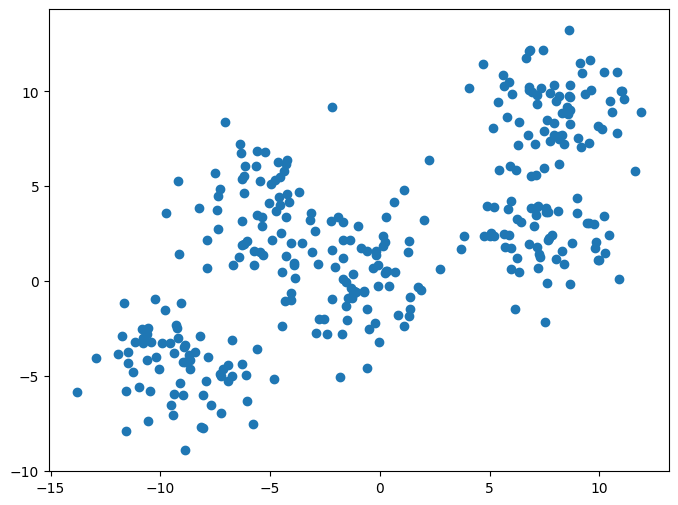

In [40]:
random.seed(234)
x, _ = make_blobs(n_samples=330, centers=5, cluster_std=1.84)
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1])
plt.show()


### Xác định GMM và điều chỉnh nó trên dữ liệu x

In [41]:
gm = GaussianMixture(n_components=5).fit(x)
centers = gm.means_
print(centers)

[[-5.55836831  3.87299888]
 [ 7.28418475  2.56387124]
 [-0.90246061  0.16230294]
 [-9.18288987 -4.47852917]
 [ 8.11454324  9.24741885]]


### Vẽ các tâm này và các điểm dữ liệu

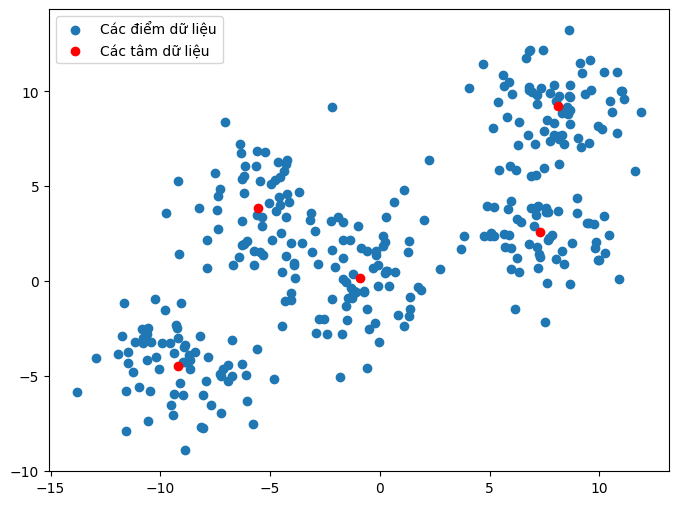

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], label='Các điểm dữ liệu')
plt.scatter(centers[:,0], centers[:,1], c='r', label='Các tâm dữ liệu')
plt.legend()
plt.show()


### Dự đoán dữ liệu x với mô hình được huấn luyện, gom nhóm các phần tử và trực quan hóa các cụm trong biểu đồ

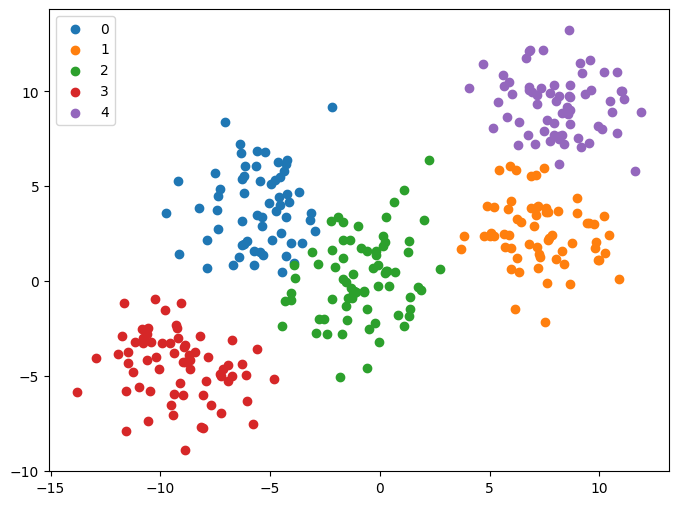

In [43]:
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 6))
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show()

### Thay đổi số cụm và vẽ các cụm này trong cùng đồ thị

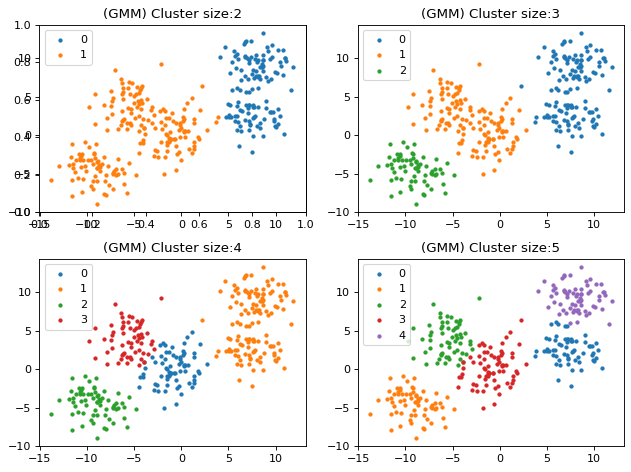

In [44]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    gm = GaussianMixture(n_components=i).fit(x)
    pred = gm.predict(x)
    df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("(GMM) Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()
plt.show()


### Gom cụm sử dụng k-means

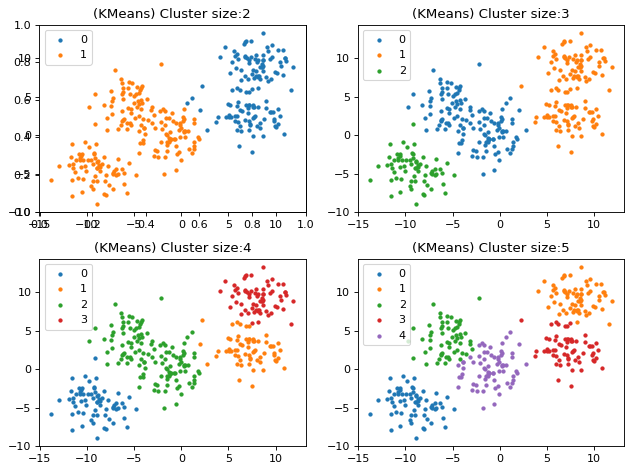

In [45]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
    km = KMeans(n_clusters=i, n_init=10).fit(x)
    pred = km.predict(x)
    df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
    groups = df.groupby('label')
    f.add_subplot(2, 2, i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("(KMeans) Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()
plt.show()


##  2. Cài đặt thuật toán Mahalanobis k-means

In [46]:
def calculate_mahalanobis_distance(point, center, covariance_matrix):
    return mahalanobis(point, center, np.linalg.inv(covariance_matrix))

In [62]:
def mahalanobis_kmeans(X, k, max_iters=100, tol=1e-4):
    n_samples, n_features = X.shape
    
    # Khởi tạo ngẫu nhiên k tâm cụm
    np.random.seed(10)
    centers = X[np.random.choice(n_samples, k, replace=False)]
    
    # Khởi tạo ma trận hiệp phương sai cho mỗi cụm
    covariance_matrices = [np.cov(X.T) for _ in range(k)]
    
    labels = np.zeros(n_samples)
    for it in range(max_iters):
        new_centers = np.zeros((k, n_features))
        counts = np.zeros(k)
        
        # Gán cụm
        for i, x in enumerate(X):
            distances = [calculate_mahalanobis_distance(x, centers[j], covariance_matrices[j]) for j in range(k)]
            labels[i] = np.argmin(distances)
            new_centers[int(labels[i])] += x
            counts[int(labels[i])] += 1
        
        # Cập nhật tâm cụm và ma trận hiệp phương sai
        for j in range(k):
            if counts[j] != 0:
                new_centers[j] /= counts[j]
            covariance_matrices[j] = np.cov(X[labels == j].T)
        
        # Kiểm tra sự hội tụ
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tol):
            break
        centers = new_centers
    
    return centers, labels


In [63]:
# Sử dụng Mahalanobis k-means để gom cụm
centers, labels = mahalanobis_kmeans(x, k=5)

print("Centers:\n", centers)

Centers:
 [[ 7.2968958   2.55895164]
 [-5.43105274  3.74483941]
 [ 8.15236154  9.3057385 ]
 [-0.68230658  0.08738861]
 [-9.17781267 -4.48596809]]


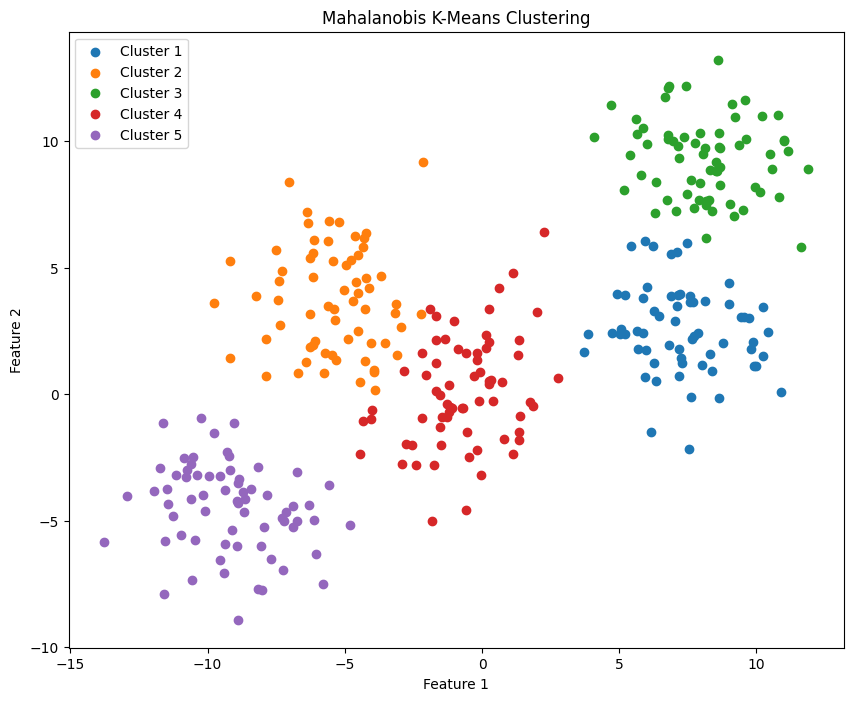

In [64]:
# Trực quan hóa kết quả
plt.figure(figsize=(10, 8))
for i in range(centers.shape[0]):
    plt.scatter(x[labels == i][:, 0], x[labels == i][:, 1], label=f'Cluster {i+1}')
plt.title('Mahalanobis K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()